In [361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [362]:
df = pd.read_csv("/Users/satwikbiswas/Documents/Python/Data/Algerian_forest_fires_dataset_UPDATE.csv",header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [363]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [364]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [365]:
df.loc[:122,"region"] = 1
df.loc[123:,"region"] = 0

In [366]:
df[df.isnull().any(axis=1)]

df.drop(122,inplace=True)
df.drop(167,inplace=True)
df = df.reset_index(drop=True)
df.drop(122,inplace=True)
df = df.reset_index(drop=True)

In [367]:
df.columns = df.columns.str.strip()

In [368]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0


In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    object 
 4   RH           243 non-null    object 
 5   Ws           243 non-null    object 
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  region       243 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.6+ KB


In [370]:
## data cleaning

df[["day","month","year","Temperature","RH","Ws"]] = df[["day","month","year","Temperature","RH","Ws"]].astype(int)

In [371]:
df[["Rain","FFMC","DMC","DC","ISI","BUI","FWI"]] = df[["Rain","FFMC","DMC","DC","ISI","BUI","FWI"]].astype(float)

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 28.6+ KB


In [373]:
df = df.drop(["day","month","year"],axis=1)

In [374]:
df["Classes"] = df["Classes"].str.strip()

In [375]:
df["Classes"].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [376]:
df["Classes"] = df["Classes"].map({"fire":1,"not fire":0})

<Axes: >

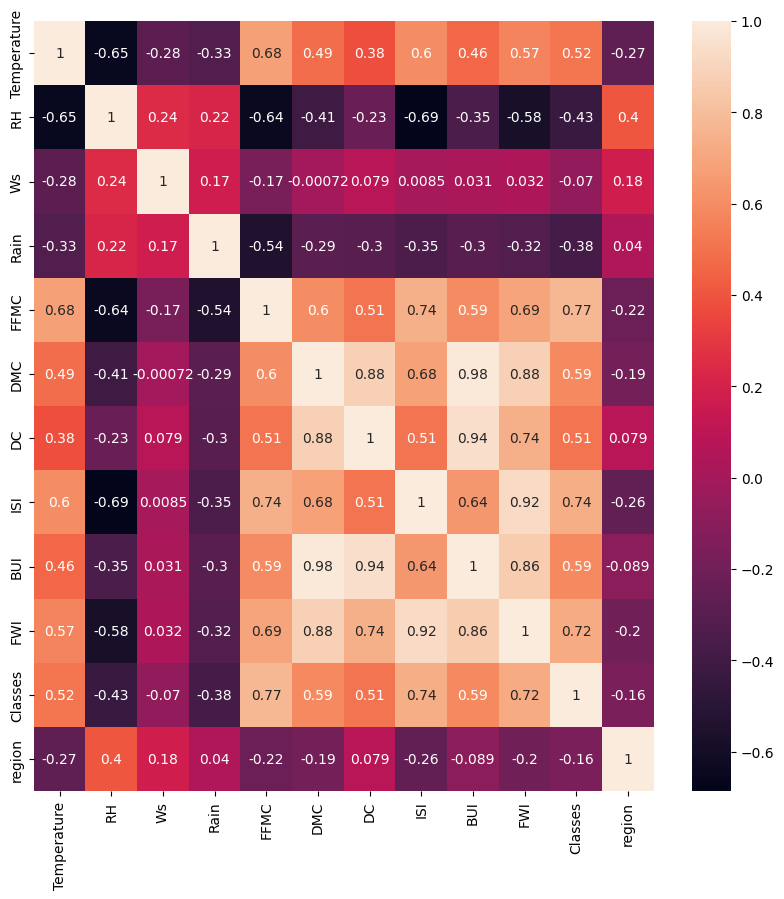

In [377]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr(),annot=True)

In [378]:
X = df.drop("FWI",axis=1)
y = df["FWI"]

X.shape

(243, 11)

In [379]:
### feature selection
## in this process we basically remove feature that are highly correlated
## if two features are highly correlated (close to +1 or -1), they carry almost the same information.
## Keeping both doesn’t add value but increases dataset dimensionality, making models unnecessarily complex.

def correlation(df,th):
    col = set()
    corr = df.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j])>=th:
                col.add(corr.columns[i])
        

    print(corr)
    return col



In [380]:
col_remove = correlation(X,0.85)
col_remove

             Temperature        RH        Ws      Rain      FFMC       DMC  \
Temperature     1.000000 -0.651400 -0.284510 -0.326492  0.676568  0.485687   
RH             -0.651400  1.000000  0.244048  0.222356 -0.644873 -0.408519   
Ws             -0.284510  0.244048  1.000000  0.171506 -0.166548 -0.000721   
Rain           -0.326492  0.222356  0.171506  1.000000 -0.543906 -0.288773   
FFMC            0.676568 -0.644873 -0.166548 -0.543906  1.000000  0.603608   
DMC             0.485687 -0.408519 -0.000721 -0.288773  0.603608  1.000000   
DC              0.376284 -0.226941  0.079135 -0.298023  0.507397  0.875925   
ISI             0.603871 -0.686667  0.008532 -0.347484  0.740007  0.680454   
BUI             0.459789 -0.353841  0.031438 -0.299852  0.592011  0.982248   
Classes         0.516015 -0.432161 -0.069964 -0.379097  0.769492  0.585658   
region         -0.269555  0.402682  0.181160  0.040013 -0.222241 -0.192089   

                   DC       ISI       BUI   Classes    region  

{'BUI', 'DC'}

In [381]:
X.drop(col_remove,axis=1,inplace=True)

In [382]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10,shuffle=True)


In [383]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [384]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [385]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression(n_jobs=-1)

regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [386]:
y_pred = regression.predict(X_test)

In [387]:
from sklearn.metrics import r2_score

score = r2_score(y_pred=y_pred,y_true=y_test)
score

0.9845036003441805

In [401]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(regression,X_train,y_train,scoring="r2",cv = 6)
print(score.mean())

0.9455122155567328


### Lasso Regression

In [402]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)

print(lasso.coef_)

score = r2_score(y_pred=y_pred,y_true=y_test)

score

[ 0.         -0.          0.         -0.          0.          3.04595691
  3.88268101  0.          0.        ]


0.9507719280238188

### Ridge Regression

In [403]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)

print(ridge.coef_)

score = r2_score(y_pred=y_pred,y_true=y_test)

score

[-0.0571058  -0.24527378  0.060673    0.05329901 -0.80649803  3.74342895
  4.54633392  0.56540894  0.41437739]


0.983692581331822

### Elasticnet Regression

In [ ]:
from sklearn.linear_model import ElasticNet
elsatic = ElasticNet()
elsatic.fit(X_train,y_train)
y_pred = elsatic.predict(X_test)


score = r2_score(y_pred=y_pred,y_true=y_test)

score

0.8803445600259009

### LassoCV
    LassoCV is a cross-validated version of the Lasso (Least Absolute Shrinkage and Selection Operator) regression model in scikit-learn. It automatically finds the best regularization strength (alpha) using cross-validation.

    The performance of Lasso heavily depends on the choice of alpha, the regularization parameter.
    Instead of manually tuning alpha, LassoCV automatically selects the best value using cross-validation.
    It avoids overfitting by selecting an alpha that generalizes well on unseen data.

In [392]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(n_jobs=-1,random_state=10,cv=5)

lasso_cv.fit(X_train,y_train)



LassoCV(cv=5, n_jobs=-1, random_state=10)

In [393]:
print(f"Best alpha: {lasso_cv.alpha_}")  ## alpha is basically the lamda used as the hyper parameter in lasso regression 

Best alpha: 0.03023939599481777


In [394]:
y_pred = lasso_cv.predict(X_test)
score = r2_score(y_pred=y_pred,y_true=y_test)
score

0.9849363575693157

In [395]:
## similarly we have ridge cv

from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(cv=5,alphas=np.logspace(-3, 1, 10))

ridge_cv.fit(X_train,y_train)



RidgeCV(alphas=array([1.00000000e-03, 2.78255940e-03, 7.74263683e-03, 2.15443469e-02,
       5.99484250e-02, 1.66810054e-01, 4.64158883e-01, 1.29154967e+00,
       3.59381366e+00, 1.00000000e+01]),
        cv=5)

In [396]:
print(f"the optimal alpha value is {ridge_cv.alpha_}")

the optimal alpha value is 3.593813663804626


In [397]:
ridge_cv.best_score_

0.957198267397007

In [398]:
from sklearn.metrics import mean_absolute_error
y_pred = ridge_cv.predict(X_test)
print(r2_score(y_pred=y_pred,y_true=y_test))
print(mean_absolute_error(y_pred=y_pred,y_true=y_test))

0.9813897581650515
0.6950581859256392


In [399]:
## similarly we alsohave elasticnetCV


    Parameter	Description	Default
    l1_ratio	Balance between L1 (Lasso) & L2 (Ridge)	0.5
    alphas	List of alpha values to try	None (auto-selected)
    cv	Number of cross-validation folds	5
    fit_intercept	Whether to fit an intercept	True    
    max_iter	Max number of iterations	1000
    tol	Convergence tolerance	1e-4
    selection	Feature selection method (cyclic or random)	"cyclic"
